### Setor: Marketing e Negócios

#### Problema a Resolver: Melhoria na segmentação de clientes e personalização de campanhas para aumentar a conversão e satisfação do cliente.


In [16]:
# Coleta e Processamento de Dados
# Vamos carregar o arquivo CSV fornecido para verificar sua estrutura e conteúdo.

import pandas as pd

# Carregando os dados
data = pd.read_csv('ifood_df.csv')

In [2]:
# Exibindo as primeiras linhas do DataFrame para entender a estrutura e os tipos de dados

data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [3]:
# Vamos realizar uma Análise Exploratória de Dados (EDA) básica no conjunto de dados fornecido.
# Resumo estatístico do conjunto de dados

summary_statistics = data.describe()

In [4]:
# Verificar a quantidade de valores ausentes por coluna
missing_values = data.isnull().sum()

In [5]:
# Resumo das primeiras análises
(summary_statistics, missing_values)

(              Income      Kidhome     Teenhome      Recency     MntWines  \
 count    2205.000000  2205.000000  2205.000000  2205.000000  2205.000000   
 mean    51622.094785     0.442177     0.506576    49.009070   306.164626   
 std     20713.063826     0.537132     0.544380    28.932111   337.493839   
 min      1730.000000     0.000000     0.000000     0.000000     0.000000   
 25%     35196.000000     0.000000     0.000000    24.000000    24.000000   
 50%     51287.000000     0.000000     0.000000    49.000000   178.000000   
 75%     68281.000000     1.000000     1.000000    74.000000   507.000000   
 max    113734.000000     2.000000     2.000000    99.000000  1493.000000   
 
          MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
 count  2205.000000      2205.000000      2205.000000       2205.000000   
 mean     26.403175       165.312018        37.756463         27.128345   
 std      39.784484       217.784507        54.824635         41.130468   
 min 

In [10]:
# Próxima etapa é realizar uma análise exploratória de dados mais aprofundada.
# Distribuições de Variáveis Individuais
# Compreender a distribuição ajuda a identificar padrões, anomalias e a forma dos dados, informando sobre transformações necessárias e possíveis estratégias de modelagem.
# Relações Entre Variáveis (Gráficos de Dispersão, Mapas de Calor)
# Identificar correlações e relações pode revelar como as variáveis interagem e influenciam o resultado, essencial para selecionar recursos para modelagem.
# Engenharia de Recursos
# Criar novos recursos pode extrair mais informações dos dados existentes, melhorando potencialmente a performance do modelo.

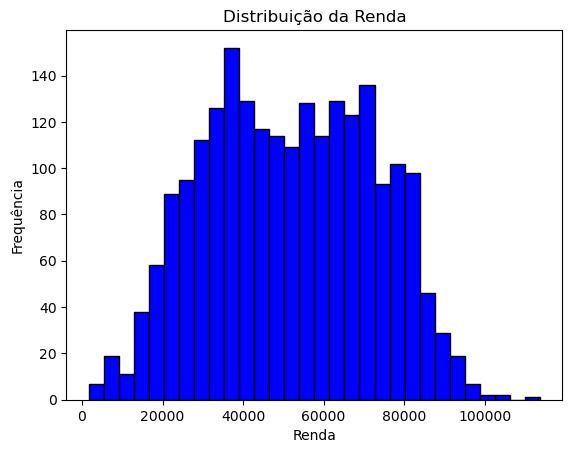

In [6]:
# Para a Distribuição de Variáveis Individuais, usamos histogramas ou gráficos de densidade para visualizar como os dados estão distribuídos.
# Isso nos ajuda a entender a centralidade, dispersão e a forma da distribuição dos dados, o que é crucial para decidir sobre transformações apropriadas e métodos estatísticos a aplicar.

# Histograma
# O histograma é uma representação gráfica da distribuição de frequência dos dados.

import matplotlib.pyplot as plt
import seaborn as sns

# Plotando o histograma
plt.hist(data['Income'], bins=30, color='blue', edgecolor='black')
plt.title('Distribuição da Renda')
plt.xlabel('Renda')
plt.ylabel('Frequência')
plt.show()

C:\Users\aaron\AppData\Local\Temp\ipykernel_15012\59015988.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Income'], shade=True)


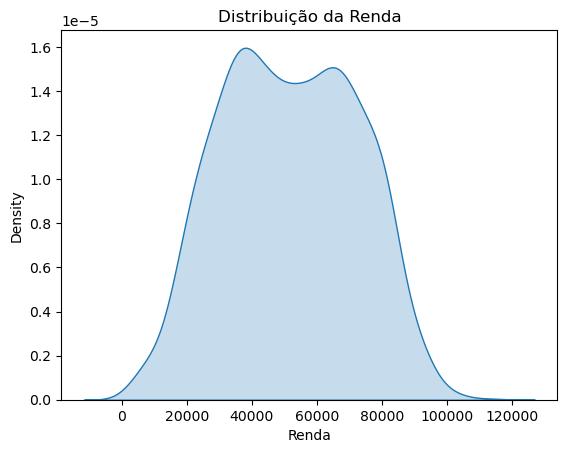

In [7]:
# Ou usando Seaborn para um gráfico de densidade
sns.kdeplot(data['Income'], shade=True)
plt.title('Distribuição da Renda')
plt.xlabel('Renda')
plt.show()

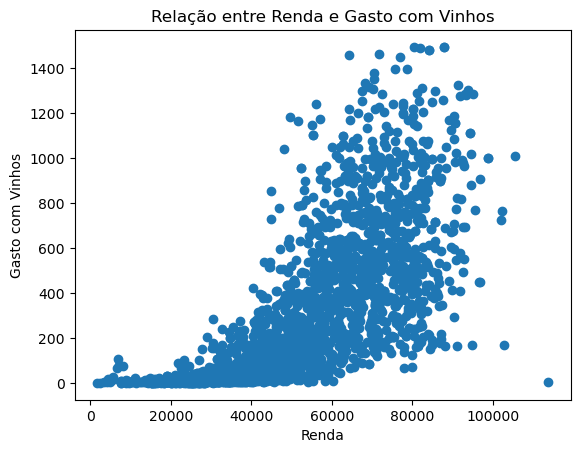

In [8]:
# A próxima etapa é explorar as relações entre variáveis.
# Isso pode ser feito usando gráficos de dispersão ou mapas de calor.
# Ajuda a identificar relações lineares ou padrões, que são fundamentais para entender como as variáveis podem afetar umas às outras

# Gráfico de Dispersão

# Plotando o gráfico de dispersão
plt.scatter(data['Income'], data['MntWines'])
plt.title('Relação entre Renda e Gasto com Vinhos')
plt.xlabel('Renda')
plt.ylabel('Gasto com Vinhos')
plt.show()

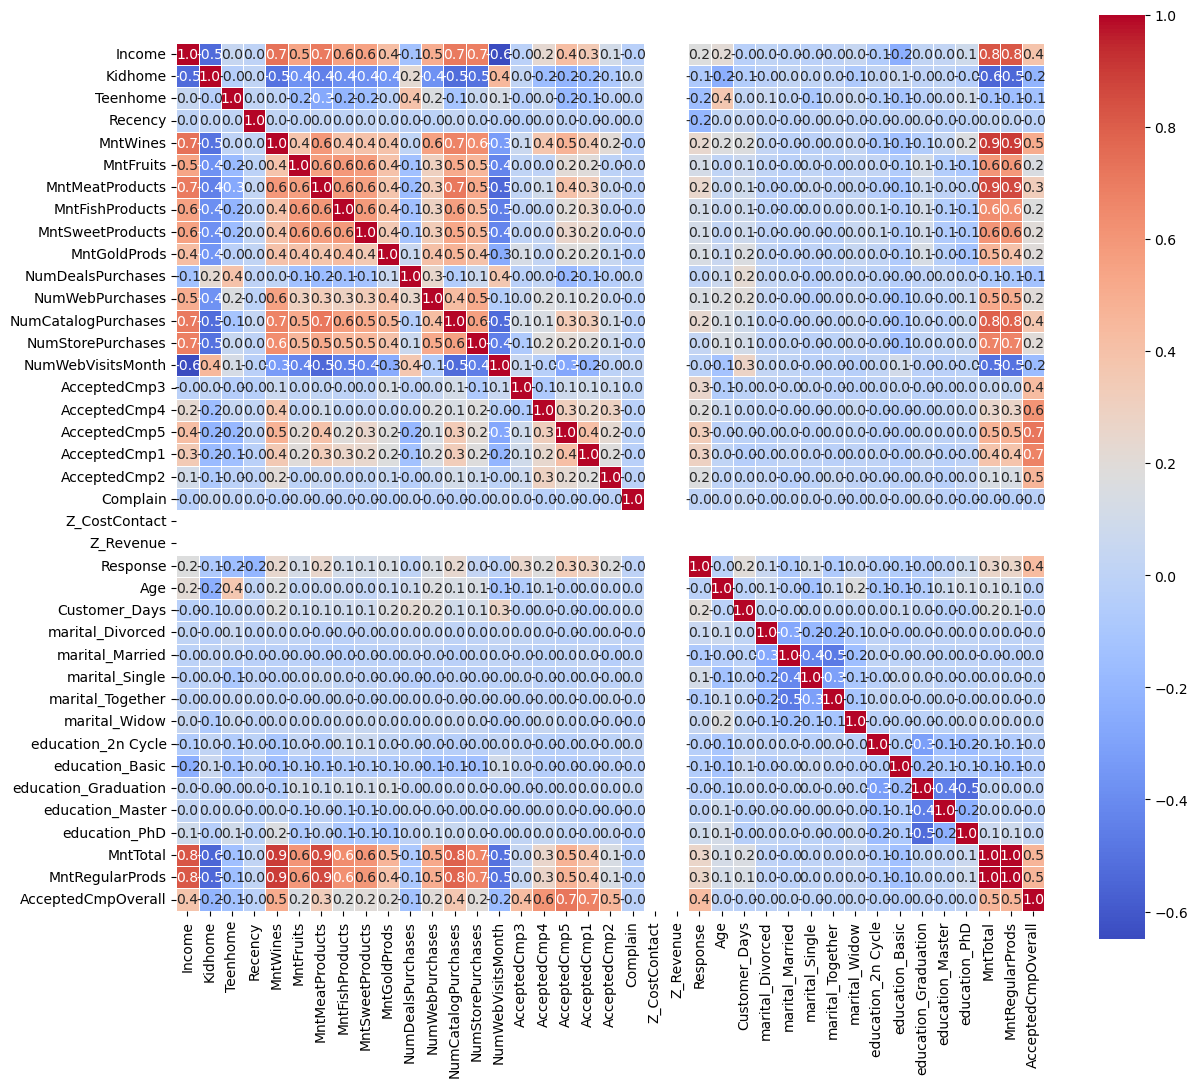

In [10]:
# mapa de calor
# O mapa de calor é uma representação gráfica da matriz de correlação entre variáveis.
# Ele nos ajuda a identificar relações lineares ou padrões, que são fundamentais para entender como as variáveis podem afetar umas às outras.

# Calcula a matriz de correlação
corr = data.corr()

# Configura o tamanho da figura para tornar a visualização mais clara
plt.figure(figsize=(14, 12))

# Gera um mapa de calor com a matriz de correlação
# 'annot = True' adiciona os coeficientes de correlação nos quadrados (pode remover se ainda estiver muito poluído)
# 'fmt' especifica o formato numérico para anotação
sns.heatmap(corr, annot=True, fmt=".1f", cmap='coolwarm', square=True, linewidths=.5)

# Rotaciona os rótulos dos eixos para melhor legibilidade
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Mostra o mapa de calor
plt.show()


In [17]:
# Análise de cluster, objetivo é agrupar os clientes em grupos com base em seus atributos, ou seja, características semelhantes.
# Isso pode ser feito usando o algoritmo K-Means, que é um algoritmo de aprendizado não supervisionado.
# O algoritmo K-Means agrupa os dados em um número especificado de clusters, tentando fazer com que os itens em cada cluster sejam semelhantes entre si.
# Ele agrupa os dados em clusters de igual variância, minimizando uma métrica conhecida como inércia ou soma dos quadrados dentro do cluster.
# O algoritmo K-Means requer que o número de clusters seja especificado.
# Vamos se basear em variáveis relevantes para realizar a análise de cluster.

# importtando as bibliotecas

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import pandas as pd

# Carregando os dados

data = pd.read_csv('ifood_df.csv')

In [18]:
# Análise de Cluster com K-Means
# Selecionar variáveis para o clustering
features = data[['Income', 'MntWines', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'MntFishProducts']]
# Normalizar os dados
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [19]:
# Definir o modelo K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
# Fazer o fit do modelo
clusters = kmeans.fit_predict(features_scaled)
# Adicionar os rótulos dos clusters ao DataFrame
data['Cluster'] = clusters

d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] O sistema não pode encontrar o arquivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "d:\anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "d:\anaconda\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\anaconda\Lib\subpro

In [20]:
# Análise de Regressão para entender a influência de diferentes variáveis nos gastos
# Definir variáveis independentes e dependentes
X = data[['Age', 'Income', 'Kidhome', 'Teenhome']]
y = data['MntWines']

In [21]:
# Criar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [22]:
# Coeficientes de regressão indicam a influência de cada variável independente
coeficientes = pd.DataFrame(model.coef_, X.columns, columns=['Coeficiente'])

print(coeficientes)

          Coeficiente
Age          0.024157
Income       0.010577
Kidhome    -97.522392
Teenhome   -19.428139


In [ ]:
# Entender nos DETALHES CÓDIGOS ACIMA DE ANÁLISE DE CLUSTERS E REGRESSÃO